**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ChurnData.csv")
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [5]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn', 'callcard']]

In [7]:
df

,tenure,age,address,income,ed,employ,equip,churn,callcard
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0.0,1.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0.0,1.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0.0,1.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0


In [8]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', ]])
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.]])

In [9]:
Y = np.asarray(df[['churn']])
Y[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [10]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit(X).transform(X)
X_norm[:]

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.58477841,
        -0.85972695,  0.64686916],
       [-0.11604313, -0.62595491,  0.03454064, ..., -1.14437497,
        -0.85972695, -1.54590766],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.92053635,
        -0.85972695, -1.54590766],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.02518185,
        -0.85972695,  0.64686916],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.58477841,
        -0.85972695,  0.64686916],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.31784991,
         1.16316   ,  0.64686916]])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state= 42)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)

In [13]:
yhat = lr.predict(X_test)
yhat[:]

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0.])

In [14]:
yhat_probab = lr.predict_proba(X_test)
yhat_probab[:5]

array([[0.46014508, 0.53985492],
       [0.18152338, 0.81847662],
       [0.81260363, 0.18739637],
       [0.70499184, 0.29500816],
       [0.76478748, 0.23521252]])

tenure    -0.527075
age       -0.322787
address    0.153378
income     0.113951
ed         0.306002
employ    -0.617857
equip      0.384737
churn     -0.243636
dtype: float64


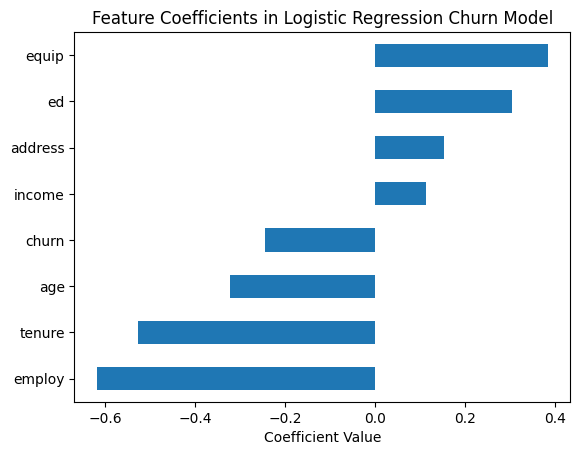

In [15]:
coeffs = pd.Series(lr.coef_[0], index= df.columns[:-1])
print(coeffs)
coeffs.sort_values().plot(kind = 'barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [16]:
from sklearn.metrics import log_loss


log_loss(Y_test, yhat_probab)

0.37996228907763124